1 hemisphere stuff yeehaw

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import results as r
import numpy as np
from PIL import Image
import glob
import random

In [2]:
def file_order(fname): #for sorting glob'ed lists of files from output directories to match the file list csv's.
    return(int(fname.split('/')[-2]))

def unnorm(og_img, normed_img):
    
    un= normed_img*np.std(og_img)
    un=un+np.mean(og_img)

    #fits_scaled=un/255
    #fits_scaled=fits_scaled*2*2550
    #fits_scaled=fits_scaled-2550
    
    return(un)

def setup(model_name, new=True):
    location='/home/zenalisa/data/output/'+model_name
    
    #signal=location+'/signal.tiff'
    #target=location+'/target.tiff'
    #prediction=location+'/prediction_smallrun_1131.tiff'

    target_path = location+'/*/target.tiff'
    signal_path = location+'/*/signal.tiff'
    prediction_path = location+'/*/prediction_'+model_name+'.tiff'
    #print(prediction_path)
    

    target_list = glob.glob(target_path)
    target_list.sort(key=file_order)
    signal_list = glob.glob(signal_path)
    signal_list.sort(key=file_order)
    prediction_list = glob.glob(prediction_path)
    prediction_list.sort(key=file_order)
    print len(prediction_list)
    
    target_list_new=[]
    prediction_list_new=[]
    signal_list_new=[]
    
    if new:
        location_new=location+'/new'
        target_path_new = location_new+'/*/target.tiff'
        signal_path_new = location_new+'/*/signal.tiff'
        prediction_path_new = location_new+'/*/prediction_'+model_name+'.tiff'

        target_list_new = glob.glob(target_path_new)
        target_list_new.sort(key=file_order)
        signal_list_new = glob.glob(signal_path_new)
        signal_list_new.sort(key=file_order)
        prediction_list_new = glob.glob(prediction_path_new)
        prediction_list_new.sort(key=file_order)
        print(len(prediction_list_new))

    
    return(signal_list, target_list, prediction_list, signal_list_new, target_list_new, prediction_list_new)

In [3]:
def setup2(model_name, new=True):
    #did not really need a whole separate copy of this just to change the pathname for south_only but here we are
    location='/home/zenalisa/data/output/south_only_'+model_name.split('_')[1]
    
    #signal=location+'/signal.tiff'
    #target=location+'/target.tiff'
    #prediction=location+'/prediction_smallrun_1131.tiff'

    target_path = location+'/*/target.tiff'
    signal_path = location+'/*/signal.tiff'
    prediction_path = location+'/*/prediction_'+model_name+'.tiff'
    #print(prediction_path)
    

    target_list = glob.glob(target_path)
    target_list.sort(key=file_order)
    signal_list = glob.glob(signal_path)
    signal_list.sort(key=file_order)
    prediction_list = glob.glob(prediction_path)
    prediction_list.sort(key=file_order)
    print len(prediction_list)
    
    target_list_new=[]
    prediction_list_new=[]
    signal_list_new=[]
    
    if new:
        location_new=location+'/new'
        target_path_new = location_new+'/*/target.tiff'
        signal_path_new = location_new+'/*/signal.tiff'
        prediction_path_new = location_new+'/*/prediction_'+model_name+'.tiff'

        target_list_new = glob.glob(target_path_new)
        target_list_new.sort(key=file_order)
        signal_list_new = glob.glob(signal_path_new)
        signal_list_new.sort(key=file_order)
        prediction_list_new = glob.glob(prediction_path_new)
        prediction_list_new.sort(key=file_order)
        print(len(prediction_list_new))

    
    return(signal_list, target_list, prediction_list, signal_list_new, target_list_new, prediction_list_new)

# neither

In [4]:
model_name='1hem_neither'
signal_list, target_list, prediction_list, signal_list_new, target_list_new, prediction_list_new = setup(model_name)
signal_list3, target_list3, prediction_list3, signal_list_new3, target_list_new3, prediction_list_new3 = setup2(model_name)

500
497
500
0


Display some examples (trained AR's)

/home/zenalisa/data/1hem_210318/hmi/1342/hmi.M_720s.20111108_091200_TAI.1.magnetogram.tiff
(-14.604691, 8.233481)
(43, 174)
(43.0, 174.0)


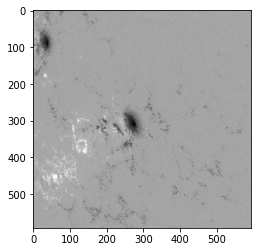

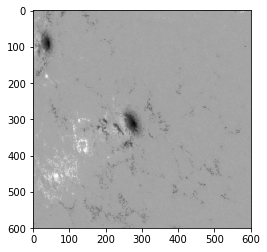

In [21]:
#unnorm test
test=np.array(Image.open(target_list[100]))
plt.imshow(test, cmap='gray')
test_og='/home/zenalisa/data/test_list_1hem_210318neither.csv'
test_og=open(test_og).readlines()[101].split(',')[1].strip().replace('/fs1/project/iip', '/home')
print(test_og)
test_og=np.array(Image.open(test_og))
plt.figure()
plt.imshow(test_og, cmap='gray')

u=np.round(unnorm(test_og, test))

print(np.amin(test), np.amax(test))
print(np.amin(test_og), np.amax(test_og))
print(np.amin(u), np.amax(u))

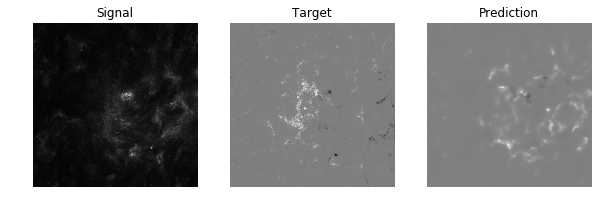

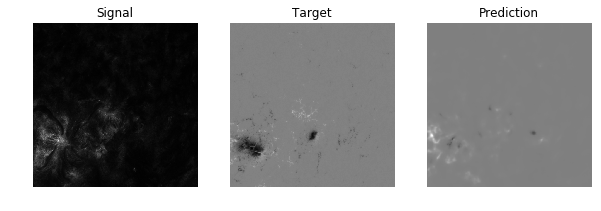

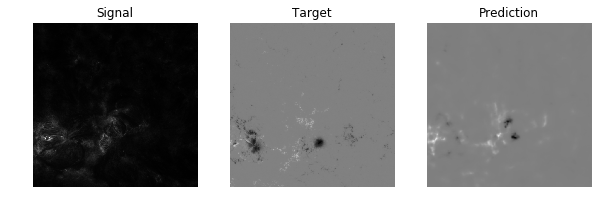

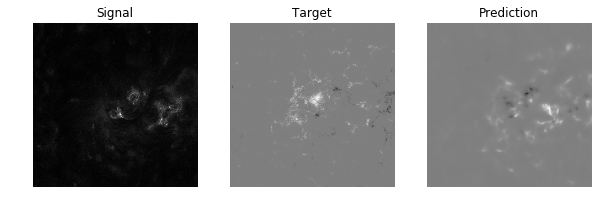

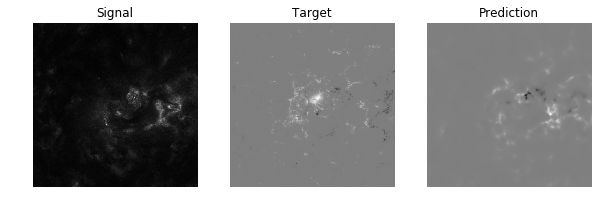

In [4]:
imgnums=random.sample(range(len(prediction_list)), 5)
for n in imgnums:
    target = target_list[n]
    signal = signal_list[n]
    prediction = prediction_list[n]
    
    plot = r.display(signal, target, prediction)

In [5]:
print(imgnums)

[419, 217, 173, 377, 375]


In [6]:
whos

Variable              Type        Data/Info
-------------------------------------------
Image                 module      <module 'PIL.Image' from <...>-packages/PIL/Image.pyc'>
glob                  module      <module 'glob' from '/hom<...>/lib/python2.7/glob.pyc'>
imgnums               list        n=5
model_name            str         1hem_neither
mpimg                 module      <module 'matplotlib.image<...>es/matplotlib/image.pyc'>
n                     int         375
np                    module      <module 'numpy' from '/ho<...>ages/numpy/__init__.pyc'>
plot                  NoneType    None
plt                   module      <module 'matplotlib.pyplo<...>s/matplotlib/pyplot.pyc'>
prediction            str         /home/zenalisa/data/outpu<...>diction_1hem_neither.tiff
prediction_list       list        n=500
prediction_list_new   list        n=497
r                     module      <module 'results' from 'results.pyc'>
random                module      <module 'random' from '/

0.005619236
[[-0.7290047  -0.5021586  -0.27531245 ... -0.27531245 -0.27531245
  -0.27531245]
 [-0.7290047  -0.27531245 -0.27531245 ... -0.27531245 -0.27531245
  -0.27531245]
 [-0.5021586  -0.27531245 -0.27531245 ... -0.27531245 -0.04846631
  -0.27531245]
 ...
 [ 0.17837983  0.40522596  0.40522596 ... -0.27531245 -0.27531245
  -0.04846631]
 [ 0.17837983  0.17837983  0.17837983 ... -0.04846631 -0.04846631
  -0.04846631]
 [-0.04846631 -0.04846631 -0.04846631 ... -0.27531245 -0.27531245
  -0.04846631]]
0.02015816304476972


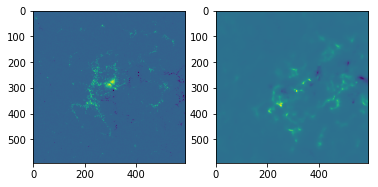

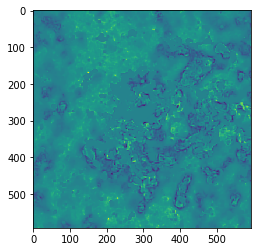

In [7]:
from PIL import Image
import matplotlib.image as mpimg
i=random.sample(range(len(prediction_list)), 1)[0]
target=target_list[i]
prediction=prediction_list[i]
t = Image.open(target)
t = np.array(t)#.astype(np.uint8)
p = Image.open(prediction)
p = np.array(p)

print(np.mean(t))

print(t)

plt.subplot(121)
plt.imshow(t)
plt.subplot(122)
plt.imshow(p)

from skimage.measure import compare_ssim
avg, s = compare_ssim(t, p, full=True)
print(avg)
plt.figure()
plt.imshow(s)

In [8]:
mux=1
muy=2
c1=0.5
c2=0.5
varx=1
vary=1
cov=.5

s_test=(2*mux*muy+c1)*(2*cov+c2)/((mux**2 + muy**2 +c1)*(varx**2+vary**2+c2))
print(s_test)

0.490909090909


Examples (new AR's)

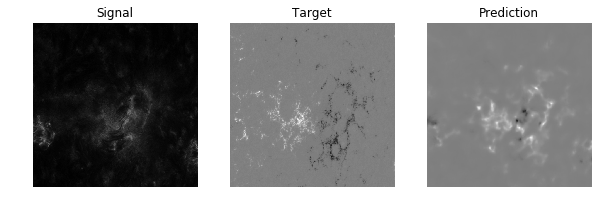

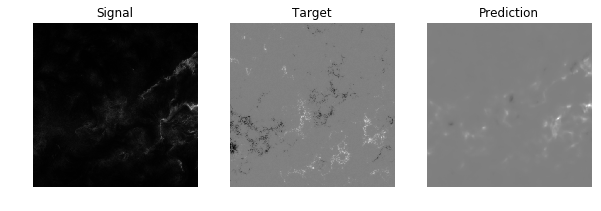

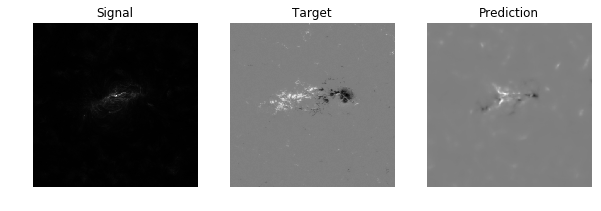

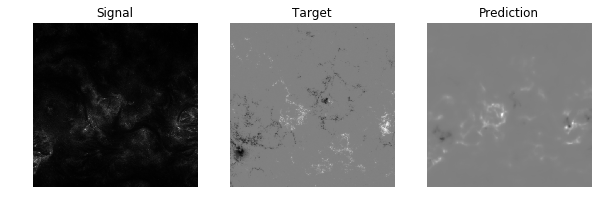

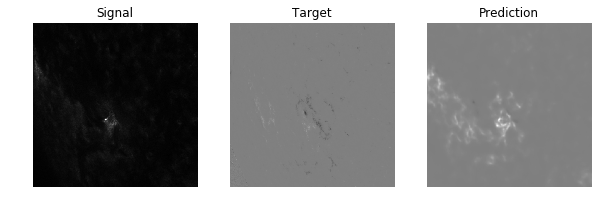

In [9]:
imgnums=random.sample(range(len(prediction_list)), 5)
for n in imgnums:    
    target = target_list_new[n]
    signal = signal_list_new[n]
    prediction = prediction_list_new[n]
    plot = r.display(signal, target, prediction)

Calculate and plot MSE and SSIM

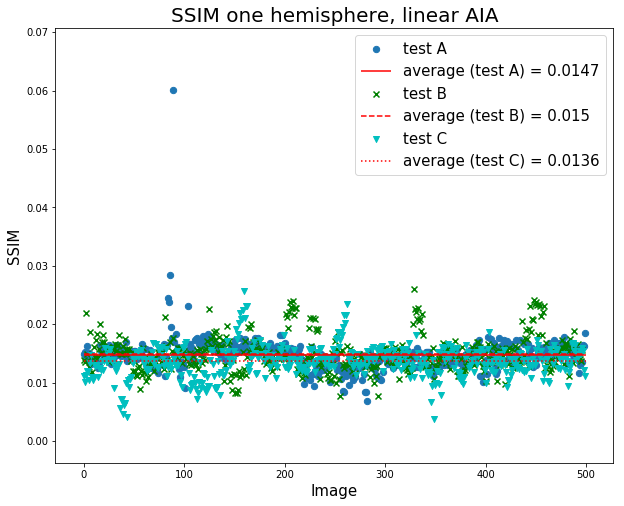

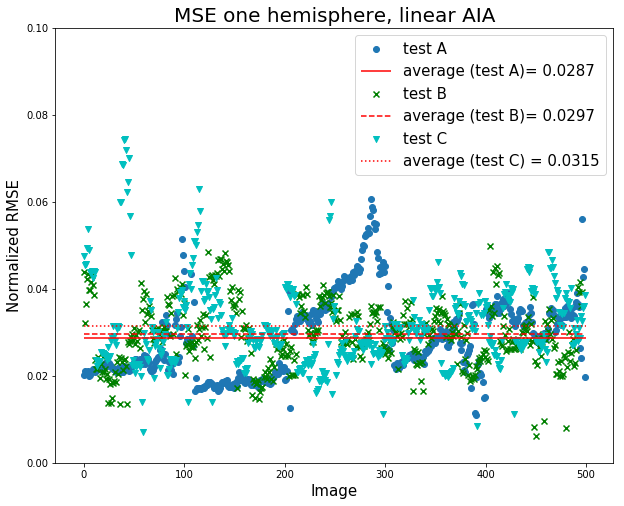

In [5]:
#target_path = '/home/zenalisa/data/output/190604_4/*/target.tiff'
#signal_path = '/home/zenalisa/data/output/190604_4/*/signal.tiff'
#prediction_path = '/home/zenalisa/data/output/190604_4/*/prediction_190604.tiff'
og_csv1='/home/zenalisa/data/test_list_1hem_210318neither.csv'
og_csv2='/home/zenalisa/data/test_list_1hem_210318neither_new.csv'
og_csv3='/home/zenalisa/data/test_list_south_only_neither.csv'

sname='one hemisphere, linear AIA'
[ssim_neither, mse_neither, ssim_neither_new, mse_neither_new]=r.ssim_mse(target_list, prediction_list, og_csv1, target_list_new, prediction_list_new, og_csv2, target_list3=target_list3, prediction_list3=prediction_list3, og_target_csv3=og_csv3, simname=sname)


# log10

In [4]:
model_name='1hem_log10'
signal_list, target_list, prediction_list, signal_list_new, target_list_new, prediction_list_new = setup(model_name)
signal_list3, target_list3, prediction_list3, signal_list_new3, target_list_new3, prediction_list_new3 = setup2(model_name)

500
500
500
0


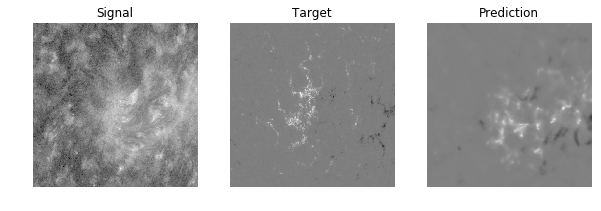

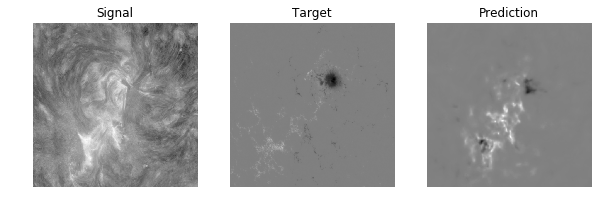

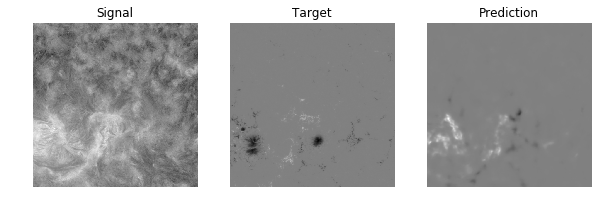

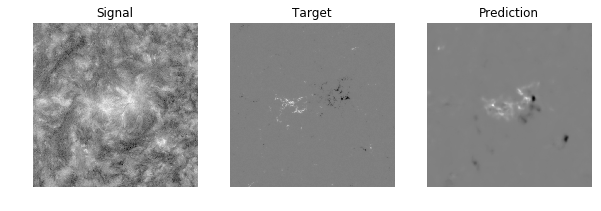

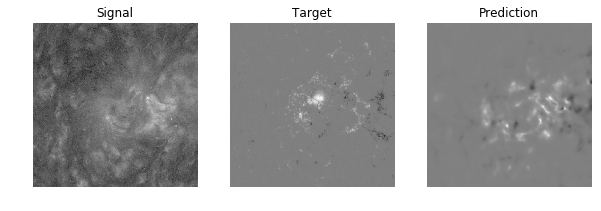

In [12]:
imgnums=random.sample(range(len(prediction_list)), 5)
for n in imgnums:
    target = target_list[n]
    signal = signal_list[n]
    prediction = prediction_list[n]
    
    plot = r.display(signal, target, prediction)
    


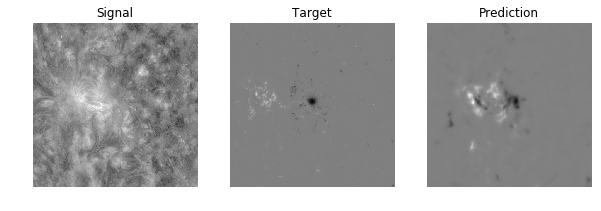

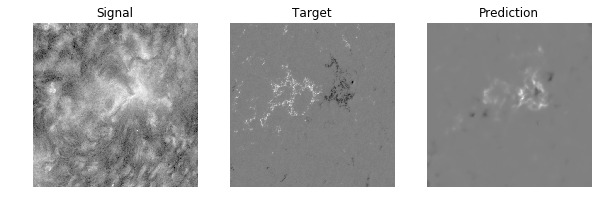

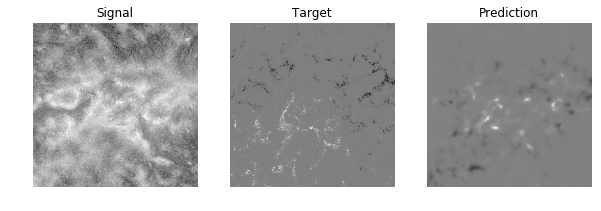

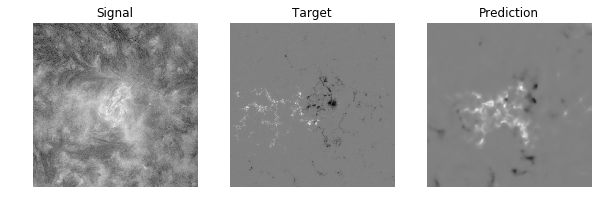

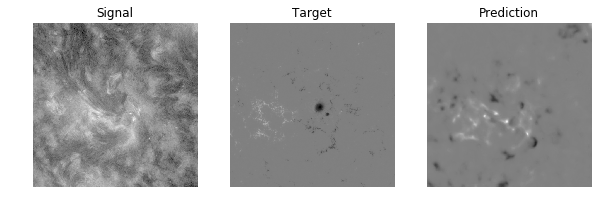

In [13]:
imgnums=random.sample(range(len(prediction_list)), 5)
for n in imgnums:    
    target = target_list_new[n]
    signal = signal_list_new[n]
    prediction = prediction_list_new[n]
    plot = r.display(signal, target, prediction)

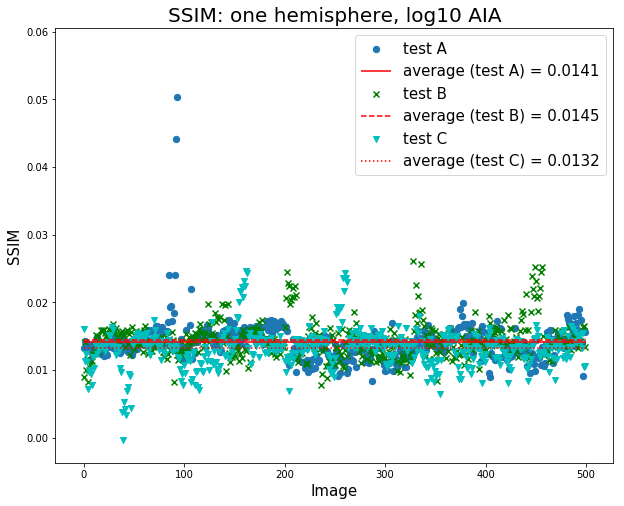

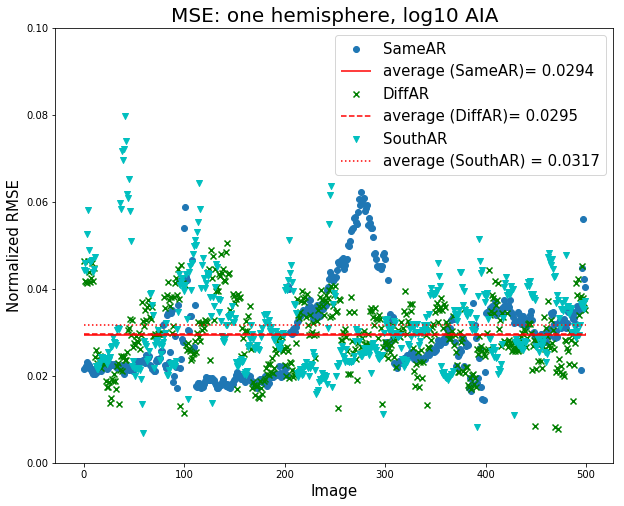

In [5]:
#target_path = '/home/zenalisa/data/output/190604_4/*/target.tiff'
#signal_path = '/home/zenalisa/data/output/190604_4/*/signal.tiff'
#prediction_path = '/home/zenalisa/data/output/190604_4/*/prediction_190604.tiff'
og_csv1='/home/zenalisa/data/test_list_1hem_210318log10.csv'
og_csv2='/home/zenalisa/data/test_list_1hem_210318log10_new.csv'
og_csv3='/home/zenalisa/data/test_list_south_only_log10.csv'

sname='one hemisphere, log10 AIA'
[ssim_log10, mse_log10, ssim_log10_new, mse_log10_new]=r.ssim_mse(target_list, prediction_list, og_csv1, target_list_new, prediction_list_new, og_csv2, target_list3=target_list3, prediction_list3=prediction_list3, og_target_csv3=og_csv3, simname=sname)


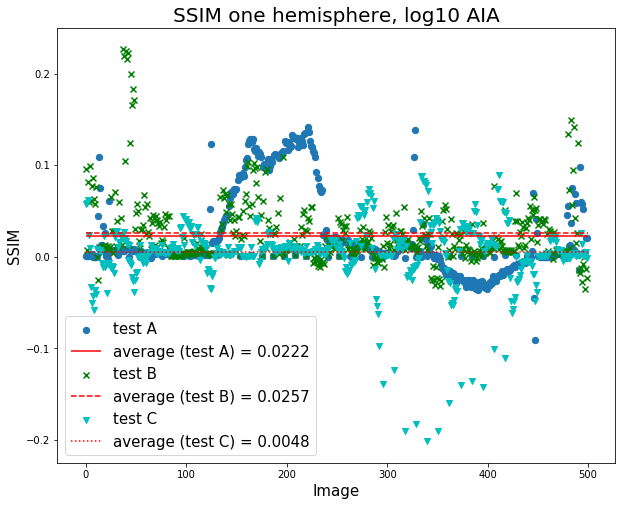

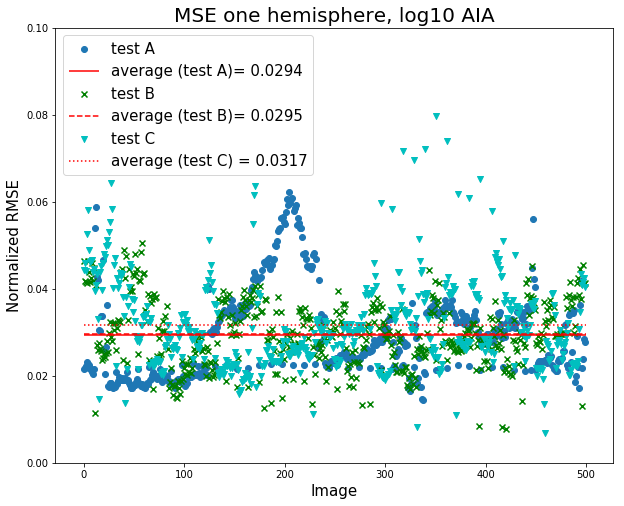

In [8]:
sname='one hemisphere, log10 AIA'
[ssim_log10, mse_log10, ssim_log10_new, mse_log10_new]=r.ssim_mse(target_list, prediction_list, target_list_new, prediction_list_new, target_list3=target_list3, prediction_list3=prediction_list3, simname=sname)


[0.029485330924801663, 0.029209798981834484]
[0.023933952522489428, 0.006470158390703234]


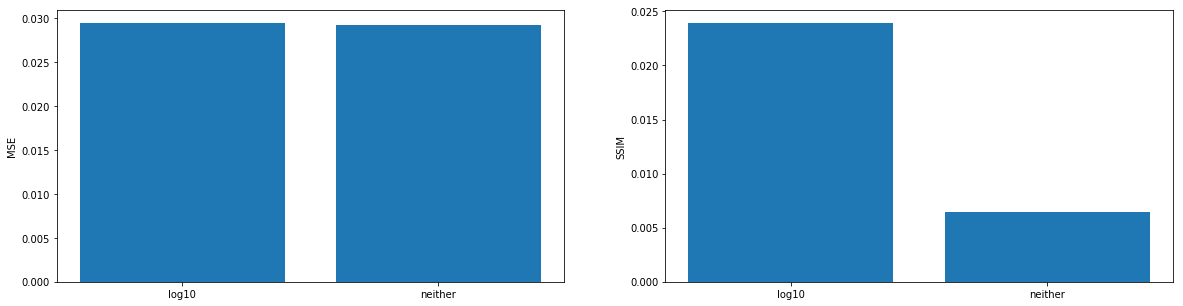

In [15]:
simnames=['log10','neither']
avg_mse = [np.mean([np.mean(mse_log10), np.mean(mse_log10_new)]), np.mean([np.mean(mse_neither),np.mean(mse_neither_new)])]
plt.figure(figsize=(20, 5))
plt.subplot(121)
plt.bar(simnames, avg_mse)
plt.ylabel('MSE');

plt.subplot(122)
avg_ssim = [np.mean([np.mean(ssim_log10), np.mean(ssim_log10_new)]), np.mean([np.mean(ssim_neither),np.mean(ssim_neither_new)])]
plt.bar(simnames, avg_ssim)
plt.ylabel('SSIM');
print(avg_mse)
print(avg_ssim)

# second run

In [16]:
model_name='1hem_neither_2'
signal_list, target_list, prediction_list, signal_list_new, target_list_new, prediction_list_new = setup(model_name)

500
497


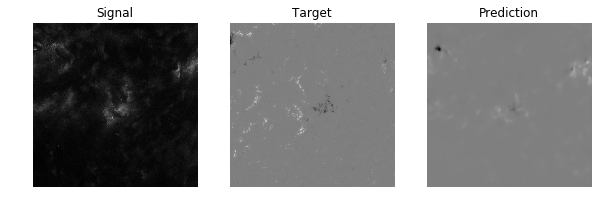

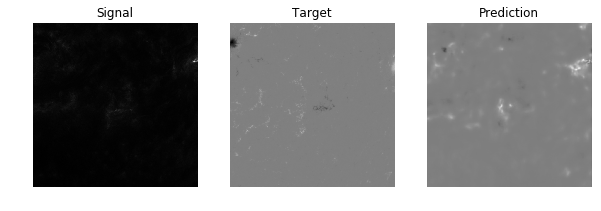

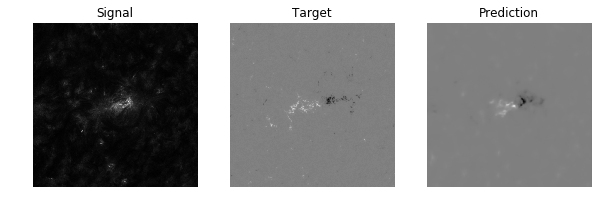

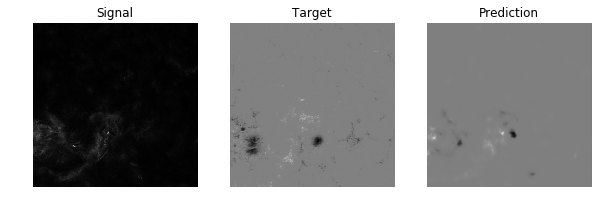

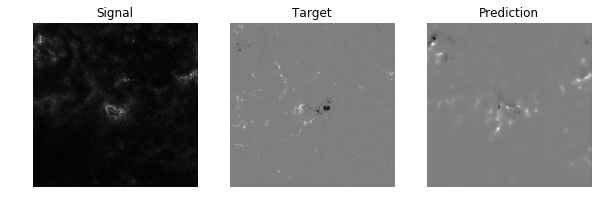

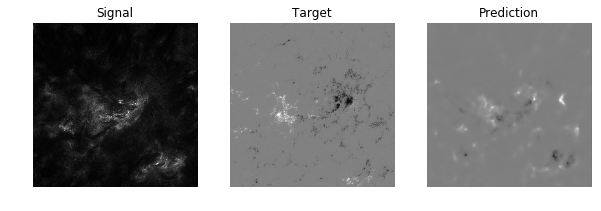

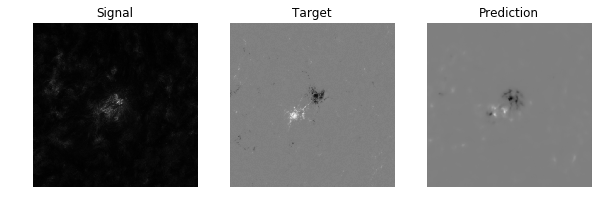

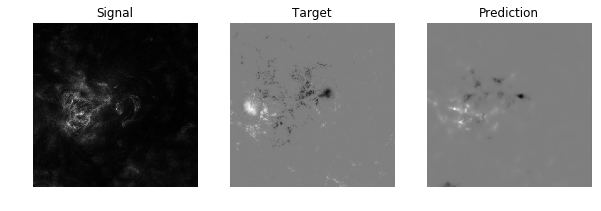

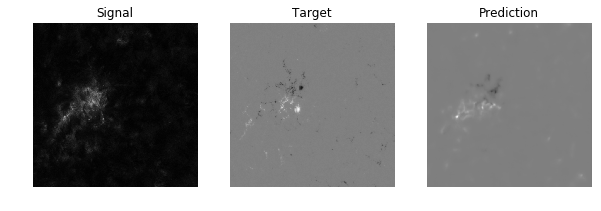

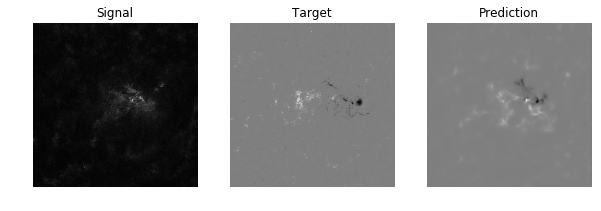

In [17]:
imgnums=random.sample(range(len(prediction_list)), 5)
for n in imgnums:
    target = target_list[n]
    signal = signal_list[n]
    prediction = prediction_list[n]
    
    plot = r.display(signal, target, prediction)
    
imgnums=random.sample(range(len(prediction_list)), 5)
for n in imgnums:    
    target = target_list_new[n]
    signal = signal_list_new[n]
    prediction = prediction_list_new[n]
    plot = r.display(signal, target, prediction)

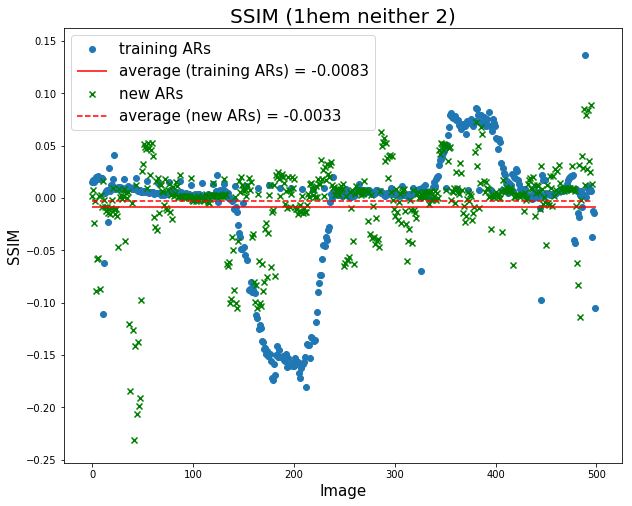

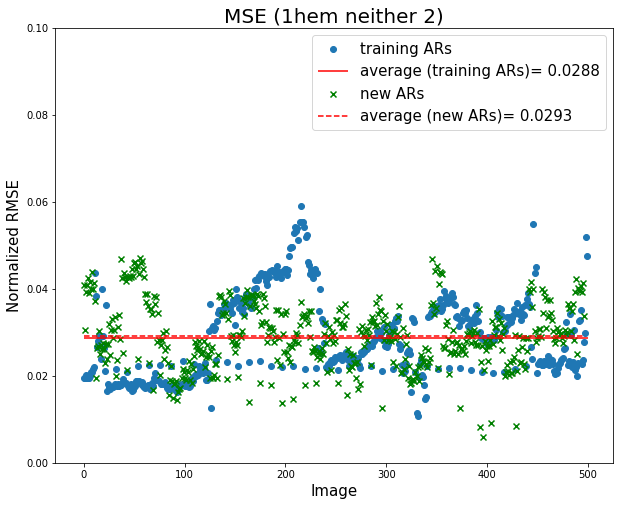

In [18]:
sname='1hem neither 2'
[ssim_log10, mse_log10, ssim_log10_new, mse_log10_new]=r.ssim_mse(target_list, prediction_list, target_list_new, prediction_list_new, simname=sname)


## Log10

In [19]:
model_name='1hem_log10_2'
signal_list, target_list, prediction_list, signal_list_new, target_list_new, prediction_list_new = setup(model_name)

500
500


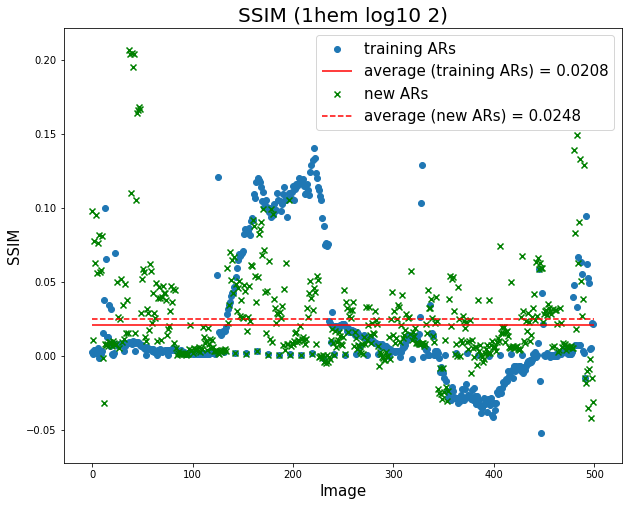

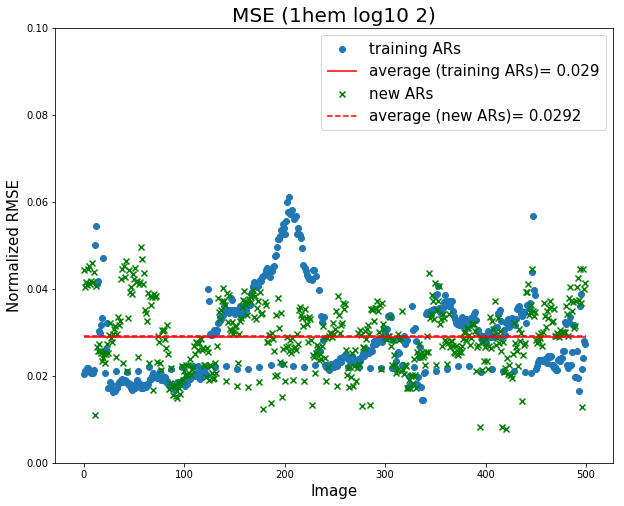

In [20]:
sname='1hem log10 2'
[ssim_log10, mse_log10, ssim_log10_new, mse_log10_new]=r.ssim_mse(target_list, prediction_list, target_list_new, prediction_list_new, simname=sname)
